In [1]:
import networkx as nx
import numpy as np

def kpathlaplacian(G, k):
    if k==1:
        L = nx.laplacian_matrix(G).toarray()
    else:
        nodelist= G.nodes()
        nsize = len(nodelist)
        L = np.zeros(shape=(nsize,nsize))
        i=1
        for n in nodelist:
            for m in nodelist[i:]:
                if((nx.shortest_path_length(G, source=n, target=m))==k):
                    L[n-1,m-1]= L[m-1,n-1]= -1
            i = i+1
            L[n-1,n-1] = np.sum(L[n-1]*-1)
    return L                       

In [2]:
import networkx as nx
import numpy as np

def kplaplacian(G):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= k
    row,col = np.diag_indices_from(L)
    L[row,col] = L.sum(axis=1)
    return L                       

In [3]:
import networkx as nx
import numpy as np

def kplaplacian_ltf(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L  

In [25]:
def generalised_degree(L,n):
    deg = (L.diagonal()).tolist()
    centrality = {}
    s = 1.0 / (n - 1.0)
    #centrality = {n: d * s for n, d in G.degree()}
    centrality ={deg.index(d): d*s for d in deg}
    return centrality

In [26]:
import networkx as nx
import itertools
import numpy as np

G = nx.Graph()
e_list = [(1,2),(2,3),(2,5),(3,4),(4,5)]
G.add_edges_from(e_list)
ll = kplaplacian_ltf(G,1)
dd = generalised_degree(ll,len(G))
print(dd)

{0: 0.3301144087102723, 1: 0.7838338208091532, 2: 0.5676676416183064, 3: 0.5462805879011192}


In [31]:
deg = (ll.diagonal()).tolist()
for d in deg:
    print(deg.index(d))

0
1
2
3
2


In [24]:
print(G.degree())

{1: 1, 2: 3, 3: 2, 4: 2, 5: 2}


In [21]:
print(nx.degree_centrality(G))

{1: 0.25, 2: 0.75, 3: 0.5, 4: 0.5, 5: 0.5}


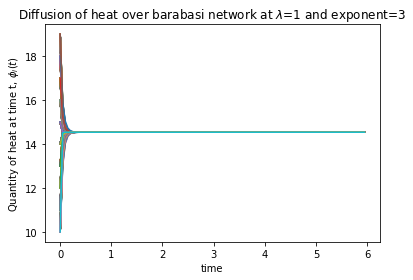

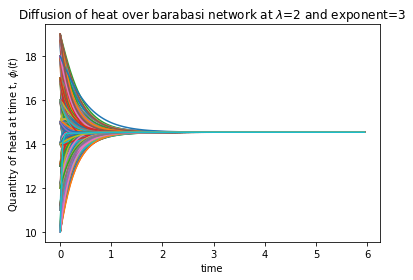

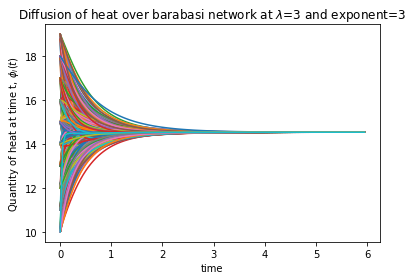

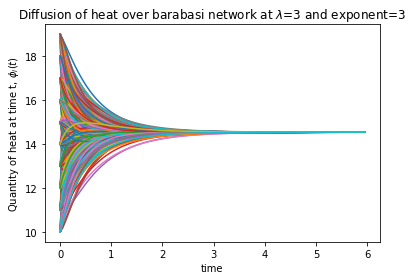

In [5]:
#Barabasi network with average degree ~6

import numpy as np
import networkx as nx
from scipy import linalg as LA
import random as random
import matplotlib.pyplot as plt

G = nx.barabasi_albert_graph(1000, 3)
n = len(G.nodes())
lam_vals = [1,2,3]

phi_0 = np.random.randint(10, 20,size=n)

for lam in lam_vals:
    L = kplaplacian_ltf(G,lam)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

    #plotting results
    phi_lst=[]   
    time = np.arange(0,6,0.05)
    for t in time :                             #Loop through times and decay each initial component
        Phi = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi = np.dot(V,Phi);  
        #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
        phi_lst.append((Phi.ravel()).tolist())

    plt.plot(time,phi_lst)
    plt.xlabel('time')
    plt.ylabel('Quantity of heat at time t, $\phi_i(t)$')
    plt.title('Diffusion of heat over barabasi network at $\lambda$='+str(lam)+' and exponent=3')
    plt.show()

l = nx.laplacian_matrix(G).todense()
D, V = LA.eigh(l);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(n,1), order='F')
phi_0 = np.reshape(phi_0,(n,1), order='F');
phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

#plotting results
phi_lst=[]   
time = np.arange(0,6,0.05)
for t in time :                             #Loop through times and decay each initial component
    Phi = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
    Phi = np.dot(V,Phi);  
    #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
    phi_lst.append((Phi.ravel()).tolist())

plt.plot(time,phi_lst)
plt.xlabel('time')
plt.ylabel('Quantity of heat at time t, $\phi_i(t)$')
plt.title('Diffusion of heat over barabasi network at $\lambda$='+str(lam)+' and exponent=3')
plt.show()

In [6]:
#erdos-renyi network with average degree ~6

import numpy as np
import networkx as nx
from scipy import linalg as LA
import random as random
import matplotlib.pyplot as plt

n = 1000
G = nx.erdos_renyi_graph(n, 0.006)
if (nx.is_connected(G)==True):

    phi_0 = np.random.randint(10, 20,size=n)

    for lam in lam_vals:
        L = kplaplacian_ltf(G,lam)

        D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
        D = np.reshape(D,(n,1), order='F')
        phi_0 = np.reshape(phi_0,(n,1), order='F');
        phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

        #plotting results
        phi_lst=[]   
        time = np.arange(0,10,0.05)
        for t in time :                             #Loop through times and decay each initial component
            Phi = (phi_0V* (np.exp(-D*t)));                             #Exponential decay for each component
            Phi = np.dot(V,Phi);  
            #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
            phi_lst.append((Phi.ravel()).tolist())

        plt.plot(time,phi_lst)
        plt.xlabel('time')
        plt.ylabel('Quantity of heat at time t, $\phi_i(t)$')
        plt.title('Diffusion of heat over Erdos Renyi network at $\lambda$='+str(lam))
        plt.show() 

In [7]:
nfrom scipy import linalg as LA
L_1 =kpathlaplacian(G, k=1)
L_1
e_vals, e_vecs = LA.eig(L_1)
e_vals

SyntaxError: invalid syntax (<ipython-input-7-f7377e580deb>, line 1)

In [ ]:
L_2 = kpathlaplacian(G, k=2)
L_2
e_vals, e_vecs = LA.eig(L_2)
e_vals

In [ ]:
L_3 = kpathlaplacian(G, k=3)
L_3
e_vals, e_vecs = LA.eig(L_3)
e_vals

In [ ]:
G = nx.Graph()
e_list = [(1,2),(2,3),(3,4),(4,5),(5,1)]
G.add_edges_from(e_list)

In [ ]:
L_1 = kpathlaplacian(G, k=1)
e_vals, e_vecs = LA.eig(L_1)
e_vals
L_1

In [ ]:
L_2 = kpathlaplacian(G, k=2)
e_vals, e_vecs = LA.eig(L_2)
e_vals

In [ ]:
G = nx.Graph()
e_list = [(1,2),(2,3),(3,4),(3,5),(3,1)]
G.add_edges_from(e_list)

In [ ]:
L_1 = kpathlaplacian(G, k=1)
e_vals, e_vecs = LA.eig(L_1)
e_vals

In [ ]:
L_2 = kpathlaplacian(G, k=2)
e_vals, e_vecs = LA.eig(L_2)
e_vals

In [ ]:
L_3 = kpathlaplacian(G, k=3)
e_vals, e_vecs = LA.eig(L_3)
e_vals

In [ ]:
G = nx.Graph()
e_list = [(1,2),(2,3),(3,4),(4,5),(5,1),(1,4),(2,5)]
G.add_edges_from(e_list)

In [ ]:
L_1 = kpathlaplacian(G, k=1)
e_vals, e_vecs = LA.eig(L_1)
e_vals

In [ ]:
L_2 = kpathlaplacian(G, k=2)
e_vals, e_vecs = LA.eig(L_2)
e_vals

In [ ]:
G = nx.Graph()
e_lst =[(1,14),(1,4),(14,2),(14,5),(2,3),(2,6),(3,7),
       (4,5),(4,15),(5,8),(5,6),(6,9),(6,7),(7,10),
       (15,8),(15,11),(8,9),(8,12),(9,10),(9,13),(10,16),
       (11,12),(12,13),(13,16)]
G.add_edges_from(e_lst)

L_1 =kpathlaplacian(G, k=1)
L_1

In [ ]:
L_1[13:,13:]

In [ ]:
L_u = L_1[:13, :13]
B_T = L_1[:13:,13:]
M1 = np.matrix([[1], [0],[0]])
R_hs = -B_T *M1
x_l1 = np.linalg.solve(L_u, R_hs)
x_l1

In [ ]:
L_2 =kpathlaplacian(G, k=2)
L_2

In [ ]:
# directed 
import networkx as nx
import numpy as np

def laplacian_matrix_digraph(G, nodelist=None, weight='weight'):
    import scipy.sparse
    if nodelist is None:
        nodelist = G.nodes()
    A = nx.to_scipy_sparse_matrix(G, nodelist=nodelist, weight=weight,
                                  format='csr')
    n,m = A.shape
    diags = A.sum(axis=1)
    D = scipy.sparse.spdiags(diags.flatten(), [0], m, n, format='csr')
    return  D - A

def kpathlaplacian(G, k):
    if k==1:
        L = laplacian_matrix_digraph(G).toarray()
    else:
        nodelist= G.nodes()
        nsize = len(nodelist)
        L = np.zeros(shape=(nsize,nsize))
        i=1
        for n in nodelist:
            nlist_copy = nodelist
            for m in nlist_copy.remove(n):
                print(m)
                #if((nx.shortest_path_length(G, source=n, target=m))==k):
                    #L[n-1,m-1]= L[m-1,n-1]= -1
            #i = i+1
            #L[n-1,n-1] = np.sum(L[n-1]*-1)
    return L                       

In [ ]:
import networkx as nx
import random
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

G = nx.DiGraph()
e_lst = [(1,0),(0,3),(2,1),(0,2),(4,0),(3,4)]
G.add_edges_from(e_lst)
kpathlaplacian(G, k=1)

In [ ]:
G = nx.DiGraph()
e_lst = [(1,0),(0,3),(2,1),(0,2),(4,0),(3,4)]
G.add_edges_from(e_lst)
kpathlaplacian(G, k=2)

In [ ]:
import networkx as nx
from scipy import linalg as LA

G = nx.Graph()
e_lst = [(1,2),(2,3),(3,4),(4,5),(5,2)]
G.add_edges_from(e_lst)
L_1 = nx.laplacian_matrix(G)
e_vals, e_vecs = LA.eigh(L_1.todense())
e_vecs

In [ ]:
e_vecs[:,1]

In [ ]:
import itertools

L_1 = kplaplacian_ltf(G,2)
e_vals, e_vecs = LA.eigh(L_1)
e_vecs

In [ ]:
e_vecs[:,1]